In [1]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans

In [2]:
eur = ["CEU", "TSI", "FIN", "GBR", "IBS"]
afr = ["YRI", "LWK", "GWD", "MSL", "ESN", "ASW", "ACB"]
eas = ["CHB", "JPT", "CHS", "CDX", "KHV"]
amr = ["MXL", "PUR", "CLM", "PEL"]
sas = ["GIH", "PJL", "BEB", "STU", "ITU"]

def tsne(num_of_pcs):
    
    pc = np.load('./PCA_top100.npy')
    pc = pc[:,0:num_of_pcs]
    tSNE = TSNE(n_components=2).fit_transform(pc)
    
    #run KMeans to figure out overall accuracy
    km = KMeans(n_clusters=5).fit(tSNE)
    
    #Separate into appropriate cluters
    group_one = []
    group_two = []
    group_three = []
    group_four = []
    group_five = []
    group_six = []
    for i,c in enumerate(km.labels_):
        if c == 0:
            group_one += [i]
        elif c == 1:
            group_two += [i]
        elif c == 2:
            group_three += [i]
        elif c == 3:
            group_four += [i]
        elif c == 4:
            group_five += [i]
        elif c == 5:
            group_six += [i]
        else:
            print("This should never print")
            
    pop = []
    with open("df_pop.csv", "r") as f:
        line = f.readline()
        while line:
            line = f.readline()
            parse = line.strip().split(",")
            if len(parse) == 2:
                pop += [parse[1]]
    
    group_one_count = [0, 0, 0, 0, 0]
    for i in group_one:
        if pop[i] in eur:
            group_one_count[0] += 1
        elif pop[i] in afr:
            group_one_count[1] += 1
        elif pop[i] in eas:
            group_one_count[2] += 1
        elif pop[i] in amr:
            group_one_count[3] += 1
        elif pop[i] in sas:
            group_one_count[4] += 1
        else:
            print(pop[i])
            
    one_accuracy = max(group_one_count)/float(sum(group_one_count))
    
    group_two_count = [0, 0, 0, 0, 0]
    for i in group_two:
        if pop[i] in eur:
            group_two_count[0] += 1
        elif pop[i] in afr:
            group_two_count[1] += 1
        elif pop[i] in eas:
            group_two_count[2] += 1
        elif pop[i] in amr:
            group_two_count[3] += 1
        elif pop[i] in sas:
            group_two_count[4] += 1
        else:
            print(pop[i])
            
    two_accuracy = max(group_two_count)/float(sum(group_two_count))
    
    group_three_count = [0, 0, 0, 0, 0]
    for i in group_three:
        if pop[i] in eur:
            group_three_count[0] += 1
        elif pop[i] in afr:
            group_three_count[1] += 1
        elif pop[i] in eas:
            group_three_count[2] += 1
        elif pop[i] in amr:
            group_three_count[3] += 1
        elif pop[i] in sas:
            group_three_count[4] += 1
        else:
            print(pop[i])
            
    three_accuracy = max(group_three_count)/float(sum(group_three_count))
    

    group_four_count = [0, 0, 0, 0, 0]
    for i in group_four:
        if pop[i] in eur:
            group_four_count[0] += 1
        elif pop[i] in afr:
            group_four_count[1] += 1
        elif pop[i] in eas:
            group_four_count[2] += 1
        elif pop[i] in amr:
            group_four_count[3] += 1
        elif pop[i] in sas:
            group_four_count[4] += 1
        else:
            print(pop[i])
            
    four_accuracy = max(group_four_count)/float(sum(group_four_count))
    
    group_five_count = [0, 0, 0, 0, 0]
    for i in group_five:
        if pop[i] in eur:
            group_five_count[0] += 1
        elif pop[i] in afr:
            group_five_count[1] += 1
        elif pop[i] in eas:
            group_five_count[2] += 1
        elif pop[i] in amr:
            group_five_count[3] += 1
        elif pop[i] in sas:
            group_five_count[4] += 1
        else:
            print(pop[i])

    five_accuracy = max(group_five_count)/float(sum(group_five_count))
    
    total_accuracy = (one_accuracy + two_accuracy + three_accuracy + four_accuracy + five_accuracy)/5.0
    print("Number of PCs:")
    print(num_of_pcs)
    print("Total Accuracy:")
    print(total_accuracy)
    return total_accuracy

In [3]:
#Ran tSNE and KMeans to figure out the best number of PCs to use for overall analysis
num = []
acc = []
for i in range(10, 101, 10):
    num += [i]
    acc += [tsne(i)]

print(num)
print(acc)

Number of PCs:
10
Total Accuracy:
0.910639441718781
Number of PCs:
20
Total Accuracy:
0.9754456738561496
Number of PCs:
30
Total Accuracy:
0.8853418171379644
Number of PCs:
40
Total Accuracy:
0.9770573618822821
Number of PCs:
50
Total Accuracy:
0.9678443633765264
Number of PCs:
60
Total Accuracy:
0.9702412753484786
Number of PCs:
70
Total Accuracy:
0.9662711325554557
Number of PCs:
80
Total Accuracy:
0.9672151849705776
Number of PCs:
90
Total Accuracy:
0.9651618398320139
Number of PCs:
100
Total Accuracy:
0.9675317472578658
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.910639441718781, 0.9754456738561496, 0.8853418171379644, 0.9770573618822821, 0.9678443633765264, 0.9702412753484786, 0.9662711325554557, 0.9672151849705776, 0.9651618398320139, 0.9675317472578658]


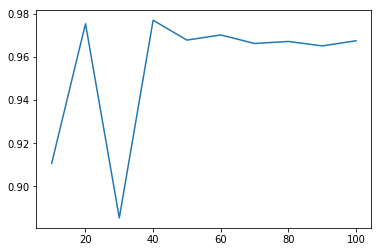

In [4]:
plt.plot(num, acc)

In [5]:
num_finer = []
acc_finer = []
for i in range(40, 81, 2):
    num_finer += [i]
    acc_finer += [tsne(i)]

print(num_finer)
print(acc_finer)

Number of PCs:
40
Total Accuracy:
0.887094487157426
Number of PCs:
42
Total Accuracy:
0.9189754083442423
Number of PCs:
44
Total Accuracy:
0.9731228532918396
Number of PCs:
46
Total Accuracy:
0.9390642394883892
Number of PCs:
48
Total Accuracy:
0.9654822684344186
Number of PCs:
50
Total Accuracy:
0.9679154890107078
Number of PCs:
52
Total Accuracy:
0.9746562106275307
Number of PCs:
54
Total Accuracy:
0.8779467068795535
Number of PCs:
56
Total Accuracy:
0.9179027159073178
Number of PCs:
58
Total Accuracy:
0.9708674413981966
Number of PCs:
60
Total Accuracy:
0.9681898484702461
Number of PCs:
62
Total Accuracy:
0.9103566049554497
Number of PCs:
64
Total Accuracy:
0.9684276034280892
Number of PCs:
66
Total Accuracy:
0.9677518671200408
Number of PCs:
68
Total Accuracy:
0.9695377152891442
Number of PCs:
70
Total Accuracy:
0.9661740574425955
Number of PCs:
72
Total Accuracy:
0.9687240333055861
Number of PCs:
74
Total Accuracy:
0.9325904112238147
Number of PCs:
76
Total Accuracy:
0.96957181908

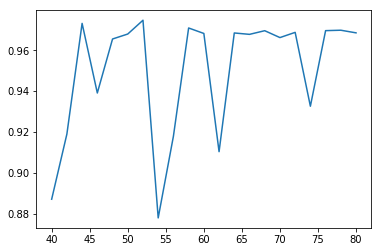

In [6]:
plt.plot(num_finer, acc_finer)